### Question 1: PCA and T-SNE

+ Implementation of PCA using `numpy`. This implementation can be found in the file `PCA.py`
+ Comparison of PCA and T-SNE on [Iris Dataset](http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data)
+ Comparison of PCA and T-SNE on the [Swiss Roll Dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_swiss_roll.html)

In [1]:
import PCA
import numpy as np
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
from sklearn.datasets import make_swiss_roll

In [2]:
all_data = np.genfromtxt('dataset.csv', delimiter=',', dtype=str)
data = all_data[:,:-1].astype(float)
outputs = all_data[:,-1]
print(data.shape)
print(outputs.shape)
print(set(outputs))

(150, 4)
(150,)
{'Iris-setosa', 'Iris-virginica', 'Iris-versicolor'}


In [3]:
pca = PCA.PCA(n_components=2)
pca.fit(data)
data_pca = pca.transform(data)
print(data_pca.shape)

PCA object: n_components: 2
(150, 2)


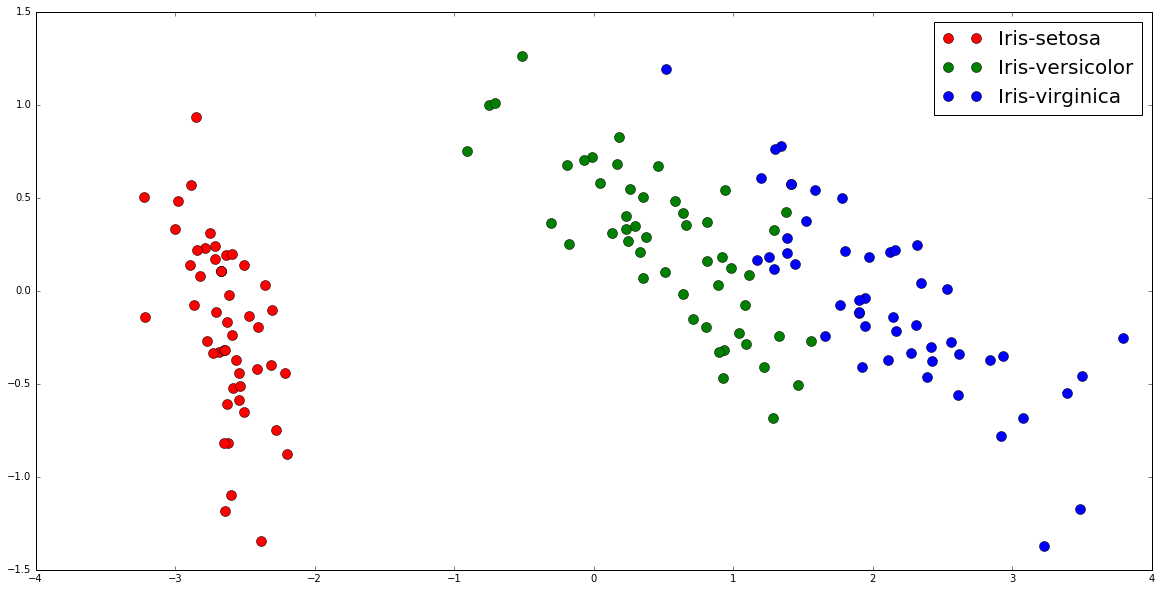

In [4]:
colours = ['ro', 'go', 'bo']
label_dict = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
plt.figure(figsize=(20, 10))
flags = [False, False, False]
for i in range(0, data_pca.shape[0]):
    if flags[label_dict[outputs[i]]] == False:
        plt.plot(data_pca[i,0], data_pca[i,1], colours[label_dict[outputs[i]]], label=outputs[i], ms=10)
        flags[label_dict[outputs[i]]] = True
    else:
        plt.plot(data_pca[i,0], data_pca[i,1], colours[label_dict[outputs[i]]], ms=10)
plt.legend(loc='upper right', prop={'size': 20})
plt.show()

#### Observations

+ Note how the datapoints for the three classes are separated. There is minimal overlap between the points of classes `Iris-versicolor` and `Iris-virginica`, but `Iris-setosa` is well separated.
+ The datapoints of `Iris-setosa` seem to have less variance in the 1st principal component.

In [5]:
tsne = TSNE(n_components=2, init='pca', learning_rate=100)
data_tsne = tsne.fit_transform(data)
print(data_tsne.shape)

(150, 2)


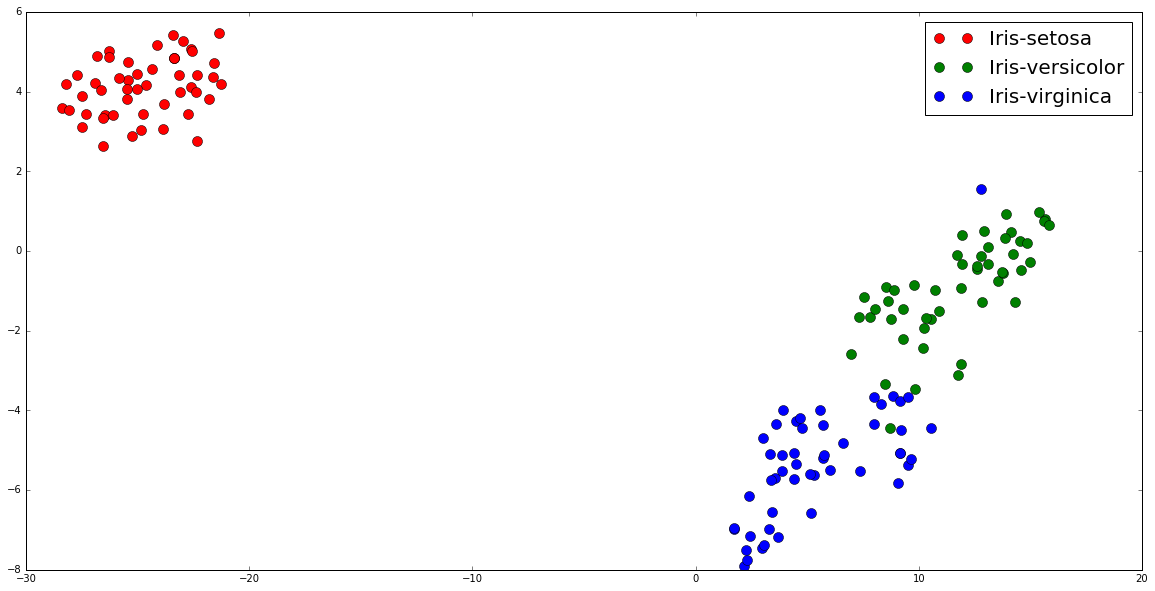

In [6]:
plt.figure(figsize=(20, 10))
flags = [False, False, False]
for i in range(0, data_tsne.shape[0]):
    if flags[label_dict[outputs[i]]] == False:
        plt.plot(data_tsne[i,0], data_tsne[i,1], colours[label_dict[outputs[i]]], label=outputs[i], ms=10)
        flags[label_dict[outputs[i]]] = True
    else:
        plt.plot(data_tsne[i,0], data_tsne[i,1], colours[label_dict[outputs[i]]], ms=10)
plt.legend(loc='upper right', prop={'size': 20})
plt.show()

#### Observations

+ Yet again `Iris-setosa` is well separated from the other outputs.
+ There is minimal overlap again between `Iris-versicolor` and `Iris-virginica`.

#### Similarities to PCA
+ Separation of `Iris-setosa` from the other 2 classes
+ Overlap between very few points in `Iris-versicolor` and `Iris-virginica`.

#### Differences from PCA
+ Shape of embedding: `Iris-setosa` has a skewed embedding in PCA, whereas here it is a ball-ish structure.
+ More concentrated embedding for all classes in t-SNE, whereas PCA embedding has a higher variance overall.

PCA object: n_components: 2
(500, 2)
(500, 2)


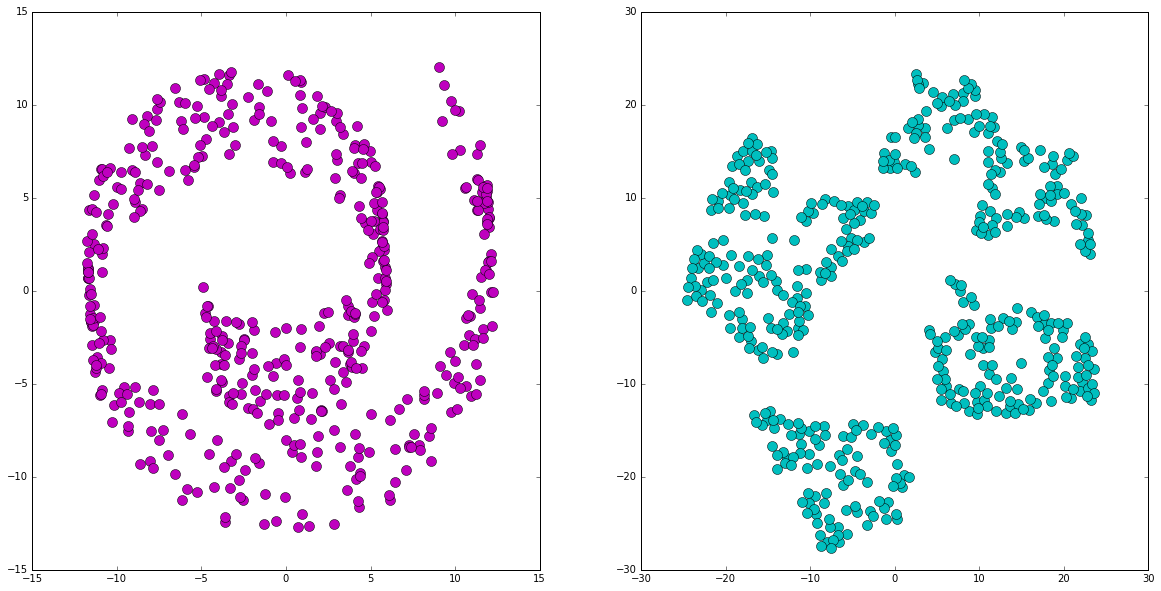

In [11]:
data, _ = make_swiss_roll(n_samples=500)
pca = PCA.PCA(n_components=2)
pca.fit(data)
data_pca = pca.transform(data)

tsne = TSNE(n_components=2)
data_tsne = tsne.fit_transform(data)

print(data_pca.shape)
print(data_tsne.shape)

plt.figure(figsize=(20, 10))
plt.subplot(121)
for i in range(0, data_pca.shape[0]):
    plt.plot(data_pca[i,0], data_pca[i,1], 'mo', ms=10)

plt.subplot(122)
for i in range(0, data_tsne.shape[0]):
    plt.plot(data_tsne[i,0], data_tsne[i,1], 'co', ms=10)
plt.show()

#### Observations

+ The "roll" structure is trying to be maintained in the PCA embedding, whereas in the t-SNE embedding, this structure is lost.
+ The embedding in PCA is more zero-centric and circular than the embedding from t-SNE.
+ The embedding tries to separate more "similar" points and make them into blobs with low variance